In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha-critobalite 1 1150
alpha-quartz 1151 2250
beta-quartz 2251 3050
beta-trydymite 3051 4300
coesite 4301 5500
Fdd2-beta-critobalite 5501 6850
hex-trydymite 6851 7850
stishovite 7851 8550


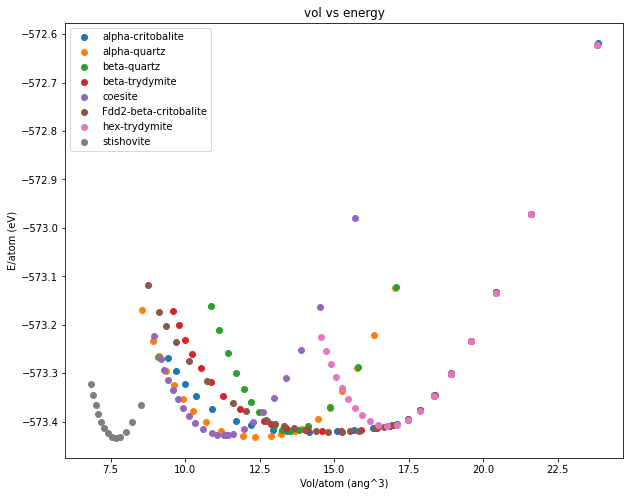

In [3]:
from descriptors.base_info import get_reindex_base
df = get_reindex_base()
df['Vol_a'] = df['Vol'] / df['natom']
df['E_a'] = df['E'] / df['natom']
min_energy  = df['E_a'].min()
structures = df['structure'].unique()
plt.figure(figsize=(10,8))
plt.xlabel('Vol/atom (ang^3)')
plt.ylabel('E/atom (eV)')
for structure in structures:
    tmp = df[df.structure == structure]
    tmp = tmp.groupby('Vol').min()
    plt.scatter(tmp['Vol_a'], tmp['E_a'], label=structure)
    plt.title(f'vol vs energy')
plt.legend()

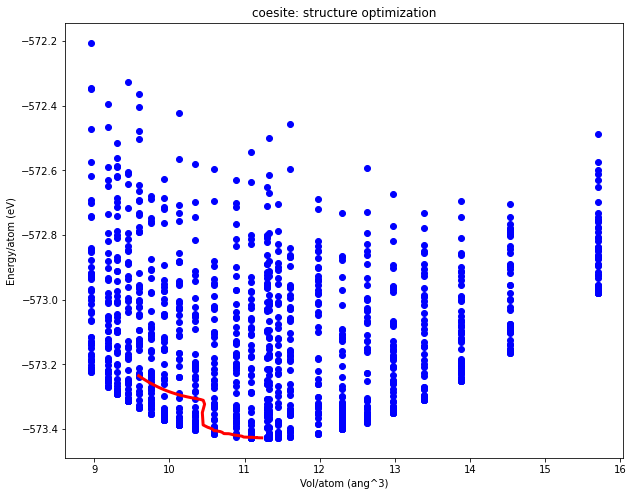

In [5]:
target_structure = 'coesite'
natom = 24

csv_dir = f'/Users/y1u0d2/desktop/Lab/result/lammps/structure-optimization/{target_structure}'
# csv_dir = f'/Users/y1u0d2/desktop/Lab/result/lammps/structure-optimization/wip'
tmp = df[df.structure == target_structure]
# tmp_df = tmp.groupby('Vol').min()
tmp_df = tmp
plt.figure(figsize=(10,8))
plt.title(f'{target_structure}: structure optimization')
plt.xlabel('Vol/atom (ang^3)')
plt.ylabel('Energy/atom (eV)')
# plt.scatter(tmp.Vol_a, tmp.E_a)
plt.scatter(tmp_df.Vol_a, tmp_df.E_a, color="blue")
df_thermo = pd.read_csv(f'{csv_dir}/thermo_{natom}.csv')
df_thermo['Vol_a'] = df_thermo.Volume / natom
df_thermo['E_a'] = df_thermo.TotEng / natom
plt.plot(df_thermo.Vol_a, df_thermo.E_a, lw=3, color="red")
plt.savefig(f'/Users/y1u0d2/desktop/Lab/result/lammps/structure-optimization/{target_structure}/{target_structure}.png')

In [24]:
tmp[tmp.Vol_a < 7.5]
# tmp[tmp.structure_idx == 7908]

,structure,structure_idx,natom,E,Vol,Vol_a,E_a
